In [7]:
AF = read.csv("AHS.csv", header=TRUE, stringsAsFactors=FALSE)
UK_hourse_price = read.csv("UK-HPI-full-file-2022-01.csv", header=TRUE, stringsAsFactors=FALSE)
head(AF)
head(UK_hourse_price)

,LA.code.202021,LA.name.202021,Year,Tenure,Units
,<chr>,<chr>,<chr>,<chr>,<int>
1,E06000001,Hartlepool,2004/5/1,Affordable Home Ownership,2
2,E06000001,Hartlepool,2004/5/1,Social Rent,14
3,E06000002,Middlesbrough,2004/5/1,Affordable Home Ownership,2
4,E06000002,Middlesbrough,2004/5/1,Social Rent,39
5,E06000002,Middlesbrough,2004/5/1,Social Rent,6
6,E06000003,Redcar and Cleveland,2004/5/1,Affordable Home Ownership,1


,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,X1m.Change,X12m.Change,AveragePriceSA,SalesVolume,⋯,NewPrice,NewIndex,New1m.Change,New12m.Change,NewSalesVolume,OldPrice,OldIndex,Old1m.Change,Old12m.Change,OldSalesVolume
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,01/01/2004,Aberdeenshire,S12000034,81693.67,40.86421,NA,NA,NA,NA,388,⋯,88436.14,40.26725,NA,NA,103,81043.95,40.88337,NA,NA,285
2,01/02/2004,Aberdeenshire,S12000034,81678.76,40.85676,NA,-0.01824784,NA,NA,326,⋯,88606.45,40.34479,0.19257621,NA,107,80965.30,40.84369,-0.0970528,NA,219
3,01/03/2004,Aberdeenshire,S12000034,83525.10,41.78032,NA,2.26048321,NA,NA,453,⋯,90296.91,41.11451,1.90783778,NA,140,82903.24,41.82130,2.3935490,NA,313
4,01/04/2004,Aberdeenshire,S12000034,84333.68,42.18478,NA,0.96807069,NA,NA,571,⋯,90319.88,41.12496,0.02543242,NA,180,84003.99,42.37659,1.3277553,NA,391
5,01/05/2004,Aberdeenshire,S12000034,86379.95,43.20835,NA,2.42640304,NA,NA,502,⋯,91989.18,41.88504,1.84820796,NA,167,86222.73,43.49585,2.6412355,NA,335
6,01/06/2004,Aberdeenshire,S12000034,89267.61,44.65280,NA,3.34297364,NA,NA,525,⋯,94964.60,43.23983,3.23453871,NA,164,89139.78,44.96738,3.3831499,NA,361


In [2]:
library(tidyr)

AF_num1 <- separate(AF, Year, into = c("Year", "month", "Day"), sep = "/")
AF_num2 <- separate(AF, Year, into = c("Year", "month"), sep = "-")

AF_num1 <-AF_num1[complete.cases(AF_num1), ]
AF_num2 <-AF_num2[complete.cases(AF_num2), ]

AF_num1 <- subset (AF_num1, select = -c(month, Day))
AF_num2 <- subset (AF_num2, select = -c(month))

new <- rbind(AF_num1, AF_num2)

head(new)

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 26270 rows [13032, 13033, 13034, 13035, 13036, 13037, 13038, 13039, 13040, 13041, 13042, 13043, 13044, 13045, 13046, 13047, 13048, 13049, 13050, 13051, ...].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 13031 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


,LA.code.202021,LA.name.202021,Year,Tenure,Units
,<chr>,<chr>,<chr>,<chr>,<int>
1,E06000001,Hartlepool,2004,Affordable Home Ownership,2
2,E06000001,Hartlepool,2004,Social Rent,14
3,E06000002,Middlesbrough,2004,Affordable Home Ownership,2
4,E06000002,Middlesbrough,2004,Social Rent,39
5,E06000002,Middlesbrough,2004,Social Rent,6
6,E06000003,Redcar and Cleveland,2004,Affordable Home Ownership,1


In [3]:
total <- rbind(AF_num1, AF_num2)
agg_total <- aggregate(total$Units, by=list(total$Year),FUN=sum, na.rm=TRUE)
colnames(agg_total) <- c('Year', 'Total')
agg_total$Year <- as.numeric(as.character(agg_total$Year))
agg_total

Year,Total
<dbl>,<int>
2004,37470
2005,45995
2006,44313
2007,53176
2008,55792
2009,58297
2010,61089
2011,58346
2012,43077


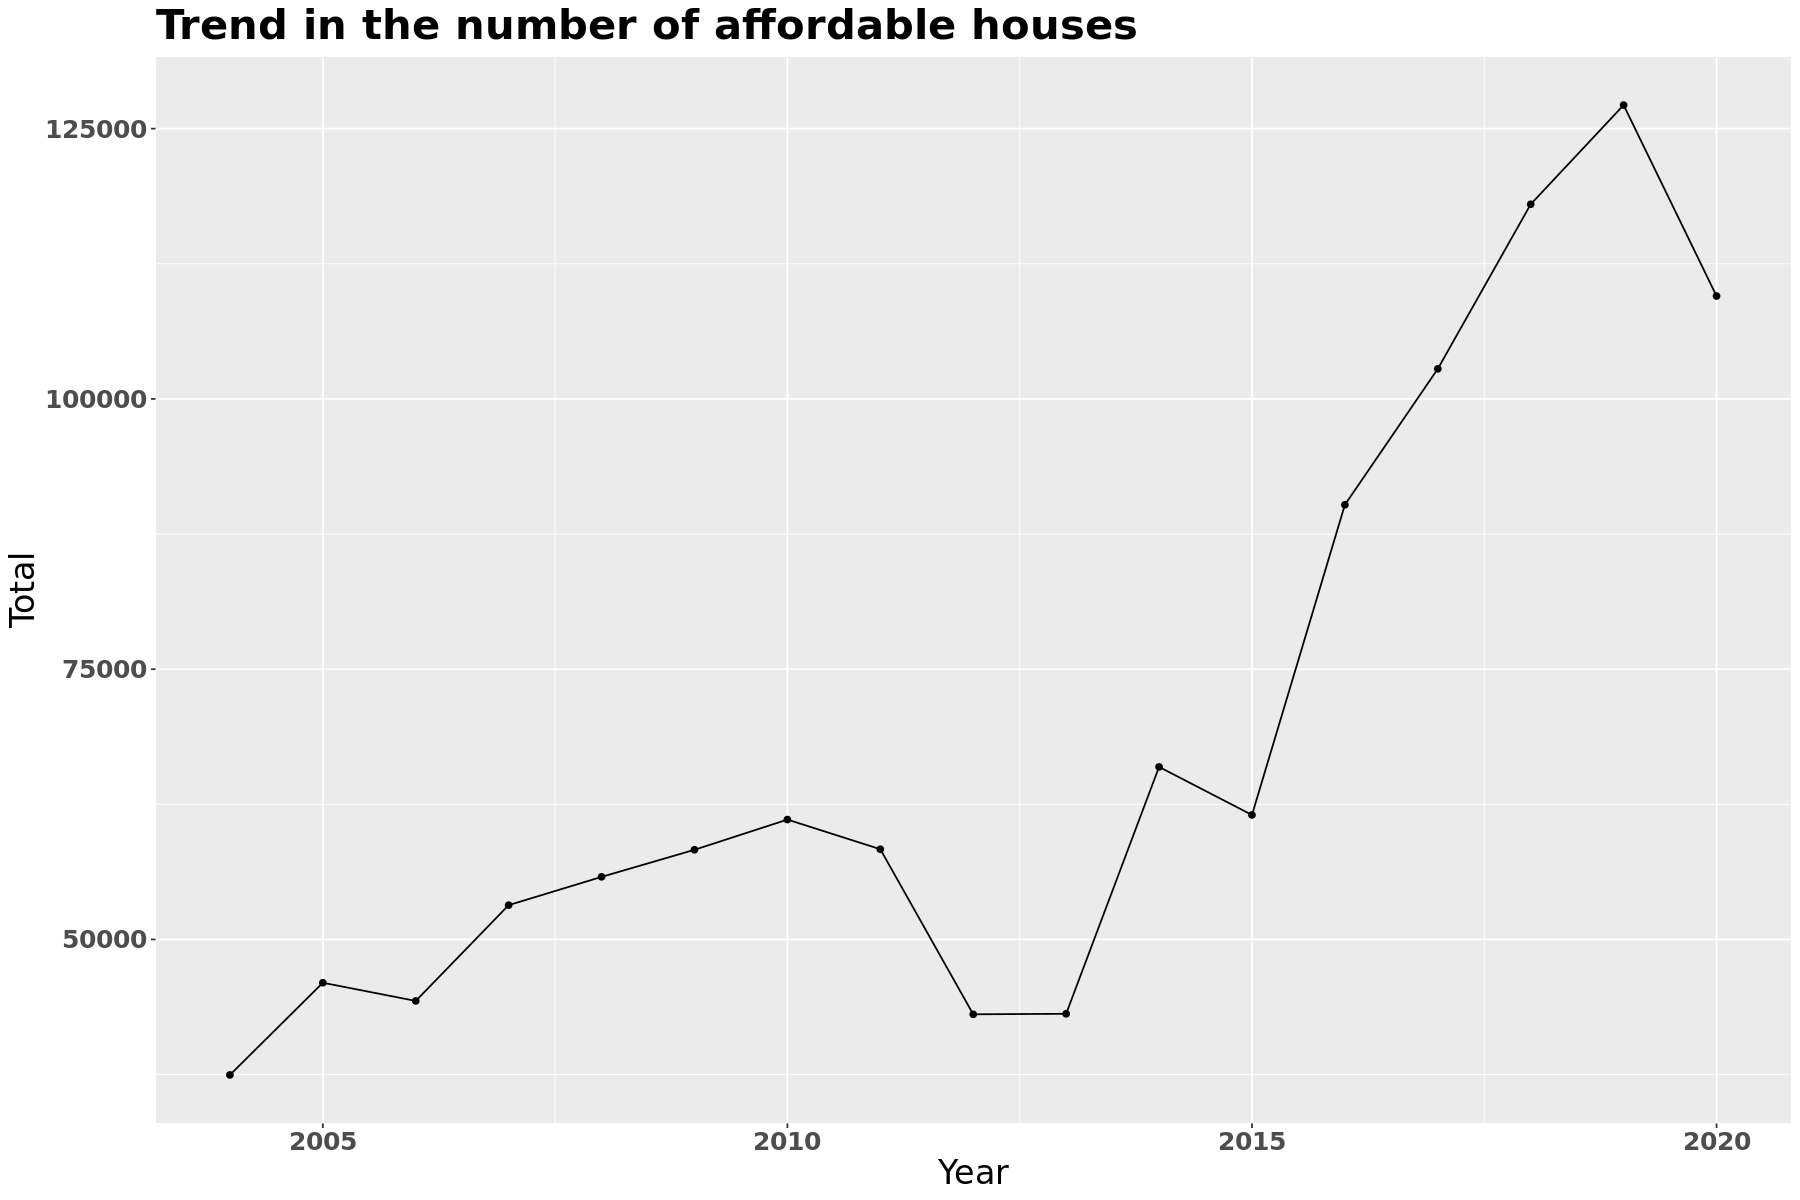

In [5]:
library(ggplot2)
options(repr.plot.width = 15, repr.plot.height =10)
ggplot(data=agg_total, aes(x=Year, y=Total)) +
  geom_line()+
  geom_point() + theme(axis.text.x = element_text(size = 15, face = "bold"),
          axis.text.y = element_text(size = 15, face = "bold"),
          axis.title.x = element_text(size = 20),
          axis.title.y = element_text(size = 20),
          plot.title = element_text(size = 25, face = "bold")) +
    ggtitle("Trend in the number of affordable houses")

In [8]:
library(tidyr)
UK_hourse_price = UK_hourse_price[,1:4]

UK_hourse_price <- separate(UK_hourse_price, Date, into = c("day", "month", "year"), sep = "/")
UK_hourse_price = UK_hourse_price[,3:6]
names(UK_hourse_price)[3] <- "Code"

UK_hourse_price_agg_2 = aggregate(UK_hourse_price[,4], by=list(UK_hourse_price$year, UK_hourse_price$RegionName, UK_hourse_price$Code),FUN=mean, na.rm=TRUE)
colnames(UK_hourse_price_agg_2) <- c("Year", "Area", "Code", "AvgPrice")
head(UK_hourse_price_agg_2)

,Year,Area,Code,AvgPrice
,<chr>,<chr>,<chr>,<dbl>
1,1995,Hartlepool,E06000001,40691.89
2,1996,Hartlepool,E06000001,39904.88
3,1997,Hartlepool,E06000001,39702.56
4,1998,Hartlepool,E06000001,40875.98
5,1999,Hartlepool,E06000001,40578.50
6,2000,Hartlepool,E06000001,43574.22


In [10]:
colnames(new) <- c('Code', 'Area', 'Year', 'Tenure', 'Units')
agg_test2 <- aggregate(new$Units, by=list(new$Code, new$Year),FUN=sum, na.rm=TRUE)
colnames(agg_test2) <- c('Code', 'Year', 'Units')
head(agg_test2)

,Code,Year,Units
,<chr>,<chr>,<int>
1,E06000001,2004,16
2,E06000002,2004,47
3,E06000003,2004,13
4,E06000004,2004,61
5,E06000005,2004,51
6,E06000006,2004,98


In [12]:
merge_AF_houseprice2 = merge(UK_hourse_price_agg_2, agg_test2, by=c("Code", "Year"))


merge_AF_houseprice3 <- merge_AF_houseprice2[!apply(merge_AF_houseprice2['Units'] > 700,1,any),]
head(merge_AF_houseprice3)

,Code,Year,Area,AvgPrice,Units
,<chr>,<chr>,<chr>,<dbl>,<int>
1,E06000001,2004,Hartlepool,81347.83,16
2,E06000001,2005,Hartlepool,100334.68,1
3,E06000001,2006,Hartlepool,114875.05,10
4,E06000001,2007,Hartlepool,126104.26,67
5,E06000001,2008,Hartlepool,122648.22,71
6,E06000001,2009,Hartlepool,109258.32,163


In [13]:
lmfit2<-with(merge_AF_houseprice3,lm(AvgPrice~Units))
summary(lmfit2)


Call:
lm(formula = AvgPrice ~ Units)

Residuals:
    Min      1Q  Median      3Q     Max 
-181305  -67227  -23030   32849 1146144 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 191469.89    2439.47   78.49   <2e-16 ***
Units          129.01      10.48   12.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 110200 on 4910 degrees of freedom
Multiple R-squared:  0.02992,	Adjusted R-squared:  0.02972 
F-statistic: 151.4 on 1 and 4910 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



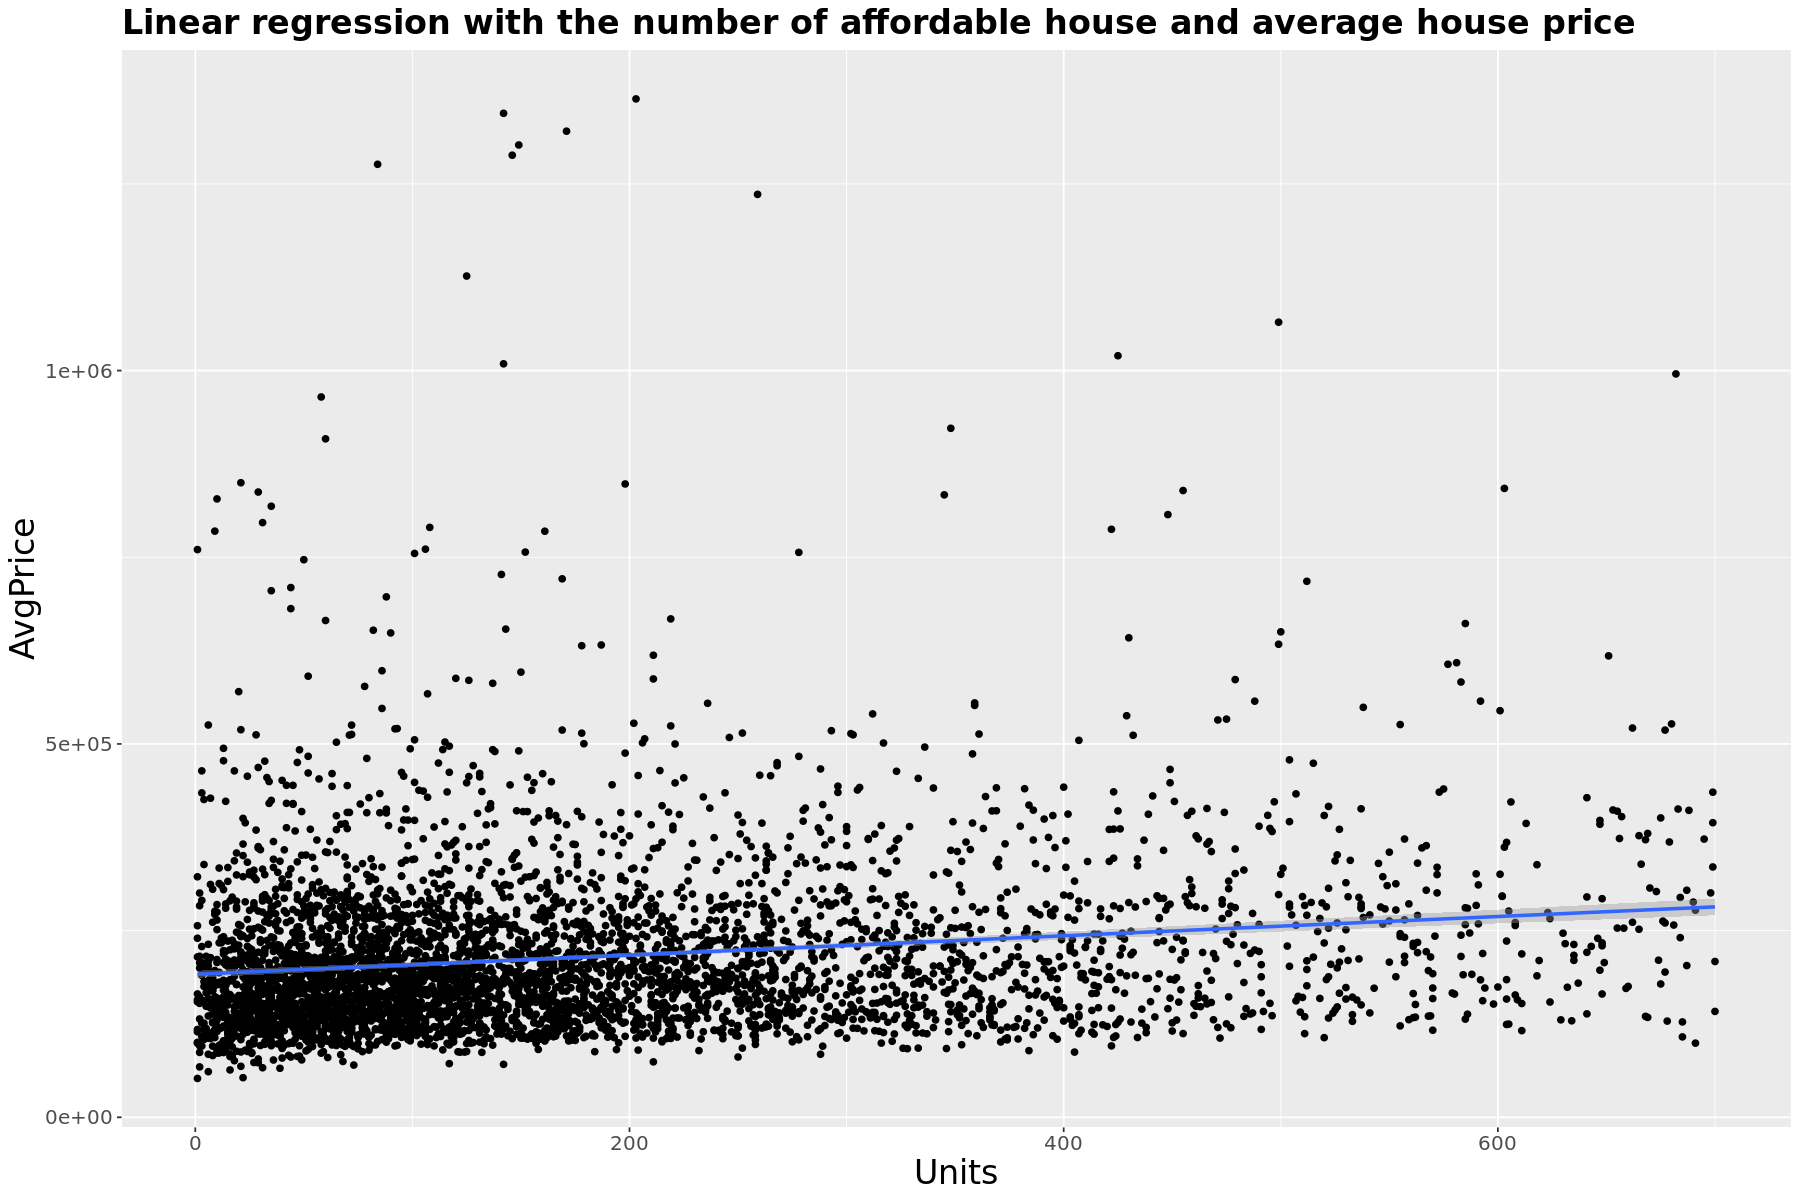

In [14]:
ggplot(lmfit2,aes(Units, AvgPrice)) +
    geom_point() +
    geom_smooth(method='lm') + 
theme(axis.text.y=element_text(size = 12),
    axis.title.x=element_text(size = 20),
    axis.title.y=element_text(size = 20),
    axis.text.x=element_text(size = 12),
    plot.title = element_text(size = 20, face = "bold")) +
ggtitle("Linear regression with the number of affordable house and average house price")

In [15]:
agg_test <- aggregate(new$Units, by=list(new$Tenure, new$Year),FUN=sum, na.rm=TRUE)
colnames(agg_test) <- c('Tenure', 'Year', 'Units')
head(agg_test)

,Tenure,Year,Units
,<chr>,<chr>,<int>
1,Affordable Home Ownership,2004,14283
2,Intermediate Rent,2004,1513
3,Social Rent,2004,21674
4,Affordable Home Ownership,2005,20687
5,Intermediate Rent,2005,1675
6,Social Rent,2005,23633


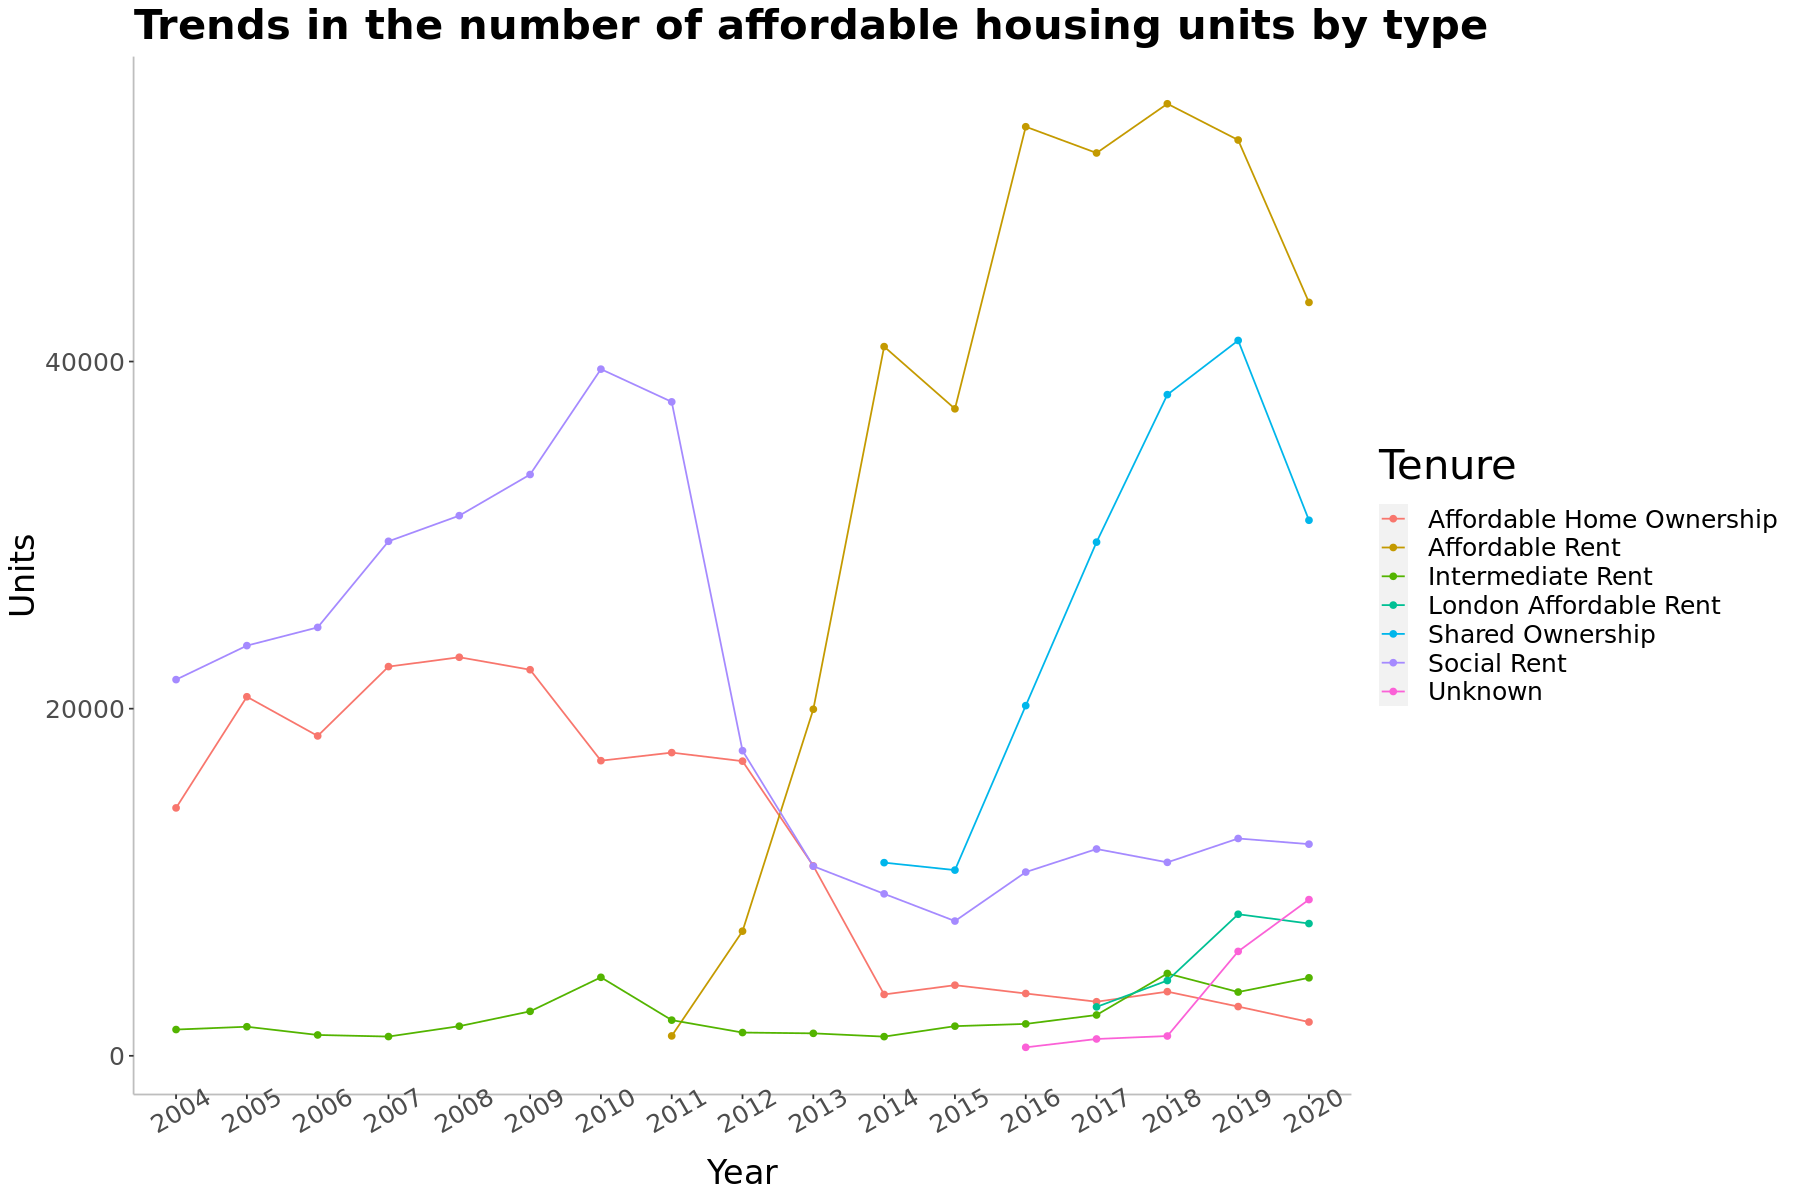

In [16]:
library(ggplot2)

options(repr.plot.width = 15, repr.plot.height =10)
ggplot(data=agg_test, aes(x=Year, y=Units, group=Tenure)) +
  geom_line(aes(color=Tenure))+
  geom_point(aes(color=Tenure)) +  theme(axis.text.x = element_text(size = 15, angle = 30),
          axis.text.y = element_text(size = 15),
          axis.title.x = element_text(size = 20),
          axis.title.y = element_text(size = 20),
          legend.text = element_text(size = 15),
          legend.title = element_text(size = 25),
          plot.title = element_text(size = 25, face = "bold"),
          # Remove panel border
          panel.border = element_blank(),  
          # Remove panel grid lines
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          # Remove panel background
          panel.background = element_blank(),
          # Add axis line
          axis.line = element_line(colour = "grey")) +
    ggtitle("Trends in the number of affordable housing units by type")

In [17]:
new1 <- new[apply(new['Tenure']=='Affordable Rent',1,any),]

new1 <- aggregate(new1$Units, by=list(new1$Year, new1$Code, new1$Tenure),FUN=sum, na.rm=TRUE)
colnames(new1) <- c("Year", "Code", "Tenure", "Units")
head(new1)
merge_AF_houseprice = merge(UK_hourse_price_agg_2, new1, by=c("Code", "Year"))
head(merge_AF_houseprice)

,Year,Code,Tenure,Units
,<chr>,<chr>,<chr>,<int>
1,2011,E06000001,Affordable Rent,4
2,2012,E06000001,Affordable Rent,59
3,2013,E06000001,Affordable Rent,50
4,2014,E06000001,Affordable Rent,65
5,2015,E06000001,Affordable Rent,150
6,2016,E06000001,Affordable Rent,112


,Code,Year,Area,AvgPrice,Tenure,Units
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
1,E06000001,2011,Hartlepool,106037.05,Affordable Rent,4
2,E06000001,2012,Hartlepool,100959.02,Affordable Rent,59
3,E06000001,2013,Hartlepool,100159.43,Affordable Rent,50
4,E06000001,2014,Hartlepool,99044.58,Affordable Rent,65
5,E06000001,2015,Hartlepool,101473.09,Affordable Rent,150
6,E06000001,2016,Hartlepool,104665.35,Affordable Rent,112


In [18]:
lmfit<-with(merge_AF_houseprice,lm(AvgPrice~Units))
summary(lmfit)


Call:
lm(formula = AvgPrice ~ Units)

Residuals:
    Min      1Q  Median      3Q     Max 
-177254  -92541  -33109   49400 1120812 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 242935.87    3558.31  68.273   <2e-16 ***
Units           27.05      18.09   1.495    0.135    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 135800 on 2683 degrees of freedom
Multiple R-squared:  0.0008326,	Adjusted R-squared:  0.0004602 
F-statistic: 2.236 on 1 and 2683 DF,  p-value: 0.135


`geom_smooth()` using formula 'y ~ x'



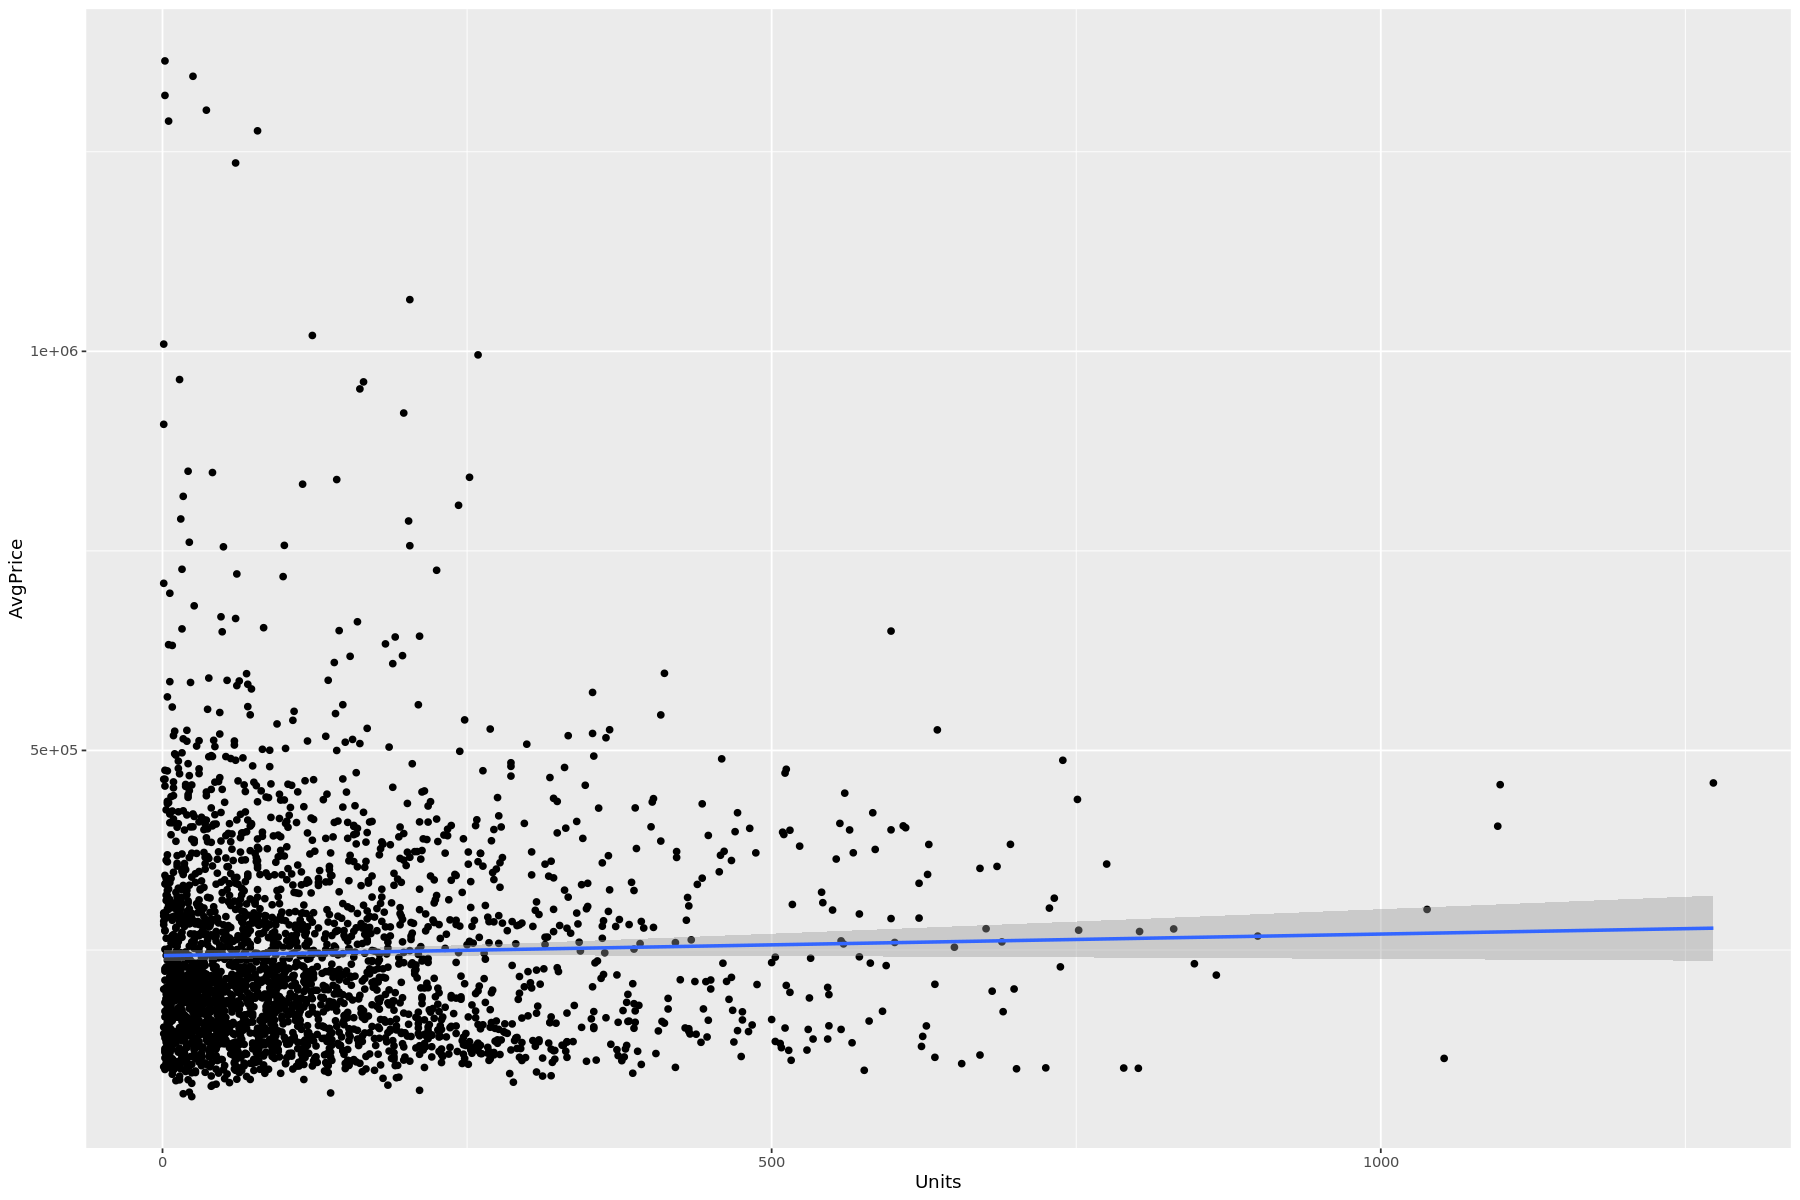

In [19]:
ggplot(lmfit,aes(Units, AvgPrice)) +
  geom_point() +
  geom_smooth(method='lm')